<a href="https://colab.research.google.com/github/mahfuz978/TECH-I.S---Regression-Classification/blob/main/Logistic_Regression/Mahfuzur_Rahman_Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Introduction**

In this project you will be provided with real world data which is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 

The classification goal is to predict if the client will subscribe a term deposit (variable y).

![img](https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2014/06/portuguese_bank/14568311-1-eng-GB/Portuguese_bank_pillars.jpg)

We are a data science team in thier offices and it our task to make the most sense of the data provided by the company

![img](https://www.expatica.com/app/uploads/sites/8/2017/05/banking-in-portugal-1920x1080.jpg)

# Let us Get Started!

As you remember our task is to explore our Bank's Marketing campaign and create meaningful insights from the data

The step one should be accessing the data 

Our data has been curated by [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) which is an excellent datahouse of various real world problems! 

We are going to use the Banking Data described by our friends in UCI [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The data can also be downloaded from the Tech I.S. [Github](https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv) Repository 



# Good Start!

Now that you have your dataset , let us go through the problems one by one!

# Section I : Data Loading

Part I : Load the dataset into the notebook <br>
Part II : Explore and make note of Attribute Information from UCI <br>
Part III : What is the significance of the `y` column in the dataset and what are the value counts of the `y` column? <br>
Part IV : What is the ratio of the two classes ? Are they balanced ? <br>

In [1]:
'''
Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking 
institution. The marketing campaigns were based on phone calls. Often, more 
than one contact to the same client was required, in order to access if the 
product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by 
date (from May 2008 to November 2010), very close to the data analyzed in [Moro 
et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected 
from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older 
version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 
(older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding 
machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a 
term deposit (variable y).


Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur',
'housemaid','management','retired','self-employed','services','student',
'technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single',
'unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school',
'illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 
'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed',
'thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: 
this attribute highly affects the output target (e.g., if duration=0 then 
y='no'). Yet, the duration is not known before a call is performed. Also, after 
the end of the call y is obviously known. Thus, this input should only be 
included for benchmark purposes and should be discarded if the intention is to 
have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this 
client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted 
from a previous campaign (numeric; 999 means client was not previously 
contacted)
14 - previous: number of contacts performed before this campaign and for this 
client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 
'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

'''
url = 'https://raw.githubusercontent.com/Tech-i-s/data-science-course-wiki/master/Step%203-2%20Classification%20Algos/01_logistic-regression/Log_reg_project/portu_banking_final.csv?token=AM2M2N6M662UYEZCMVQQS2TAGVMKW'
import pandas as pd
df = pd.read_csv(url, na_values=['unknown', 'UNKNOWN'])
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,NaN,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,NaN,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [2]:
df.info() # age needs fixing its supposed to be an integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [3]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [6]:
df.poutcome.unique()

array(['success', 'nonexistent', 'failure'], dtype=object)

In [7]:
df.day_of_week.unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

In [8]:
df.month.unique()

array(['jun', 'apr', 'aug', 'jul', 'may', 'oct', 'nov', 'mar', 'dec',
       'sep'], dtype=object)

In [9]:
df.contact.unique()

array(['cellular', 'telephone'], dtype=object)

In [10]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [11]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [12]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [13]:
df.education.unique()

array(['university.degree', 'high.school', 'basic.4y', 'basic.9y',
       'professional.course', 'basic.6y', 'basic-6y', 'basic-9y',
       'basic-4y', 'illiterate'], dtype=object)

In [14]:
df.education = df.education.str.replace('-', '.')
df.education = df.education.str.replace('.', ' ')
df.education.unique()


array(['university degree', 'high school', 'basic 4y', 'basic 9y',
       'professional course', 'basic 6y', 'illiterate'], dtype=object)

In [15]:
df.marital.unique()

array(['single', 'married', 'divorced', 'S', 'M', 'D'], dtype=object)

In [16]:
df.marital = df.marital.str.replace('S', 'single')
df.marital = df.marital.str.replace('M', 'married')
df.marital = df.marital.str.replace('D', 'divorced')
df.marital.unique()

array(['single', 'married', 'divorced'], dtype=object)

In [17]:
df.y.value_counts()

0    26629
1     3859
Name: y, dtype: int64

In [18]:
df.job.unique()

array(['management', 'services', 'retired', 'blue-collar', 'admin.',
       'housemaid', 'unemployed', 'technician', 'entrepreneur',
       'self-employed', 'student', 'MANAGEMENT', 'RETIRED', 'ADMIN.',
       'TECHNICIAN', 'HOUSEMAID', 'SERVICES'], dtype=object)

In [19]:
df['job'] = df.job.str.lower()
df.job.unique()

array(['management', 'services', 'retired', 'blue-collar', 'admin.',
       'housemaid', 'unemployed', 'technician', 'entrepreneur',
       'self-employed', 'student'], dtype=object)

In [20]:
df.age.unique() # There are unwanted a data

array(['28', '39', '55', '30', '37', '36', '27', '34', '41', '33', '26',
       '35', '32', '47', '46', '29', '44', '54', '42', '72', '43', '31',
       '24', '38', '68', '48', '59', '50', '45', '35-30', '53', '25',
       '40', '63', '58', '49', '51', '23', '56', '52', '20', '57', '74',
       '80', '61', '60', '25-30', '62', '75', '21', '82', '18-25',
       '30-32', '64', '70', '76', '73', '66', '22', '77', '71', '19',
       '79', '88', '65', '30-35', '67', '81', '69', '18', '85', '83',
       '45-50', '84', '20-40', '78', '35-40', '94', '91', '89', '87',
       '86', '95', '30-40', 39, 30, 37, 22, 31, 24, 45, 50, 33, 27, 28,
       32, 51, 41, 43, 58, 44, 35, 29, 26, 57, 25, 42, 48, 46, 38, 34, 54,
       23, 49, 62, 40, 75, 56, 53, 52, 78, 47, 36, 70, 60, 20, 66, 61, 55,
       59, 21, 88, 68, 73, 80, 79, 71, 63, 76, 83, 65, 19, 86, 17, 72, 69,
       81, 64, 77, 67, 74, 85, 82], dtype=object)

In [21]:
# ranged_index = df[df['age'] == '35-30'].index
# display(ranged_index)
# df.drop(ranged_index,inplace=True)

In [22]:
# df.age = df.age[:, 2]
# df.age.value_counts()
df.age = df.age.astype(str).str[:2]
df.age = df.age.astype('int64')
df.age.unique()

array([28, 39, 55, 30, 37, 36, 27, 34, 41, 33, 26, 35, 32, 47, 46, 29, 44,
       54, 42, 72, 43, 31, 24, 38, 68, 48, 59, 50, 45, 53, 25, 40, 63, 58,
       49, 51, 23, 56, 52, 20, 57, 74, 80, 61, 60, 62, 75, 21, 82, 18, 64,
       70, 76, 73, 66, 22, 77, 71, 19, 79, 88, 65, 67, 81, 69, 85, 83, 84,
       78, 94, 91, 89, 87, 86, 95, 17])

In [23]:
df.head() # AFTER ALL THE CLEANING

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
2,28,management,single,university degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic 4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic 4y,no,yes,no,cellular,jul,tue,68,8,999.0,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic 4y,no,yes,no,cellular,may,thu,204,1,999.0,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0


In [24]:
df.shape

(30488, 21)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 2 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  float64
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp_var_rate    30488 non-null  float64
 16  cons_price_idx  30488 non-null  float64
 17  cons_conf_idx   30488 non-null 

In [26]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41179,29,technician,single,basic 9y,no,yes,no,cellular,may,mon,214,1,999.0,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
41181,39,admin.,married,university degree,no,no,no,cellular,nov,tue,123,2,999.0,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
41182,24,admin.,married,high school,no,yes,no,cellular,may,thu,118,4,999.0,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0
41186,48,technician,married,professional course,no,no,yes,telephone,oct,tue,200,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high school,no,no,no,telephone,may,fri,112,4,999.0,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


# Section II : Data Cleaning 

Since this is real world data , A good practice is to make sure the dataset is devoid of any nuances 

Part I : Get the `dtypes` of all the columns of our dataset <br>
Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors <br>
Part III : Make note of the deviation in the dataset compared to the description provided by [UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) <br>
Part IV : Using Data Cleaning principles you learned from [Pandas Tutorial](https://github.com/Tech-i-s/data-science-course-wiki/tree/master/common/step%201-4%20(Pandas)) figure out the best ways to get rid of the dirty data 
Part V : Print the cleaned data



# Section III : Exploring data with Group by

In this section , we must create some primitive EDA

Use the `groupby` function on the mean of the following columns :

I : y <br>
II : job <br>
III : marital<br>
IV : education<br>

Make a note of what you learn from the outputs !




In [27]:
df.groupby(['y']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,38.836870,220.277555,2.593113,982.452214,0.148898,0.115690,93.552002,-40.714638,3.673637,5171.234293
1,40.352682,530.028505,2.026950,783.088624,0.507385,-1.363281,93.325331,-39.826820,1.985306,5088.904172


In [28]:
job = df.groupby(['job']).mean()
job

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,37.544352,256.957651,2.595284,951.164015,0.204761,-0.091862,93.507194,-40.315314,3.435718,5159.444420,0.139178
blue-collar,38.160352,267.684229,2.494273,981.692159,0.146960,0.054361,93.586726,-41.662467,3.564300,5168.276934,0.079648
entrepreneur,40.896235,261.168962,2.421488,985.384757,0.156107,0.052617,93.570803,-41.408632,3.686174,5172.142883,0.092746
housemaid,44.675362,256.455072,2.436232,945.742029,0.176812,0.225072,93.625751,-39.415362,3.794786,5169.542174,0.126087
management,41.521852,255.290350,2.412808,957.721333,0.200346,-0.127650,93.474031,-40.581653,3.499728,5162.667114,0.123756
retired,63.199836,277.750000,2.438322,876.478618,0.383224,-1.091447,93.338114,-38.448026,2.348341,5103.521546,0.293586
self-employed,38.816850,262.997253,2.635531,970.792125,0.161172,-0.078297,93.498116,-40.645147,3.509158,5163.935989,0.120879
services,36.760238,262.696885,2.549877,976.041302,0.175009,0.036892,93.592489,-41.571544,3.543978,5165.920021,0.090305
student,25.365574,280.995082,2.052459,836.265574,0.524590,-1.514426,93.288307,-40.354918,1.775456,5082.439016,0.332787


In [29]:
df.groupby(['marital']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.334647,256.685618,2.584014,962.944554,0.186321,0.063327,93.572146,-40.714833,3.612598,5166.650633,0.115395
married,41.378687,259.995255,2.512520,960.508118,0.181226,-0.001446,93.535416,-40.361988,3.555276,5164.379196,0.117539
single,32.679339,259.590173,2.514455,948.968442,0.221434,-0.252028,93.482513,-41.004988,3.225896,5152.011924,0.147517


In [30]:
df.groupby(['education']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic 4y,47.745798,267.397899,2.448319,951.042437,0.203361,-0.175546,93.552855,-40.368613,3.331681,5152.665294,0.136975
basic 6y,40.030238,264.908567,2.511879,971.830814,0.159107,0.030382,93.573901,-41.191721,3.569709,5166.816343,0.097912
basic 9y,38.292563,262.452526,2.482460,974.163704,0.161132,0.007975,93.571035,-41.520954,3.538043,5166.522053,0.088868
high school,37.337706,264.854656,2.532926,959.024679,0.204442,-0.089570,93.550286,-41.018652,3.424706,5159.625653,0.121314
illiterate,44.272727,241.727273,2.000000,999.000000,0.090909,-0.372727,93.170545,-40.054545,3.324182,5168.218182,0.272727
professional course,39.333025,252.957649,2.550104,958.828049,0.179357,0.056353,93.535274,-40.220273,3.582548,5164.998658,0.124508
university degree,38.323473,254.488475,2.535632,947.672397,0.209278,-0.133356,93.465672,-40.050960,3.417846,5158.664243,0.148098


# Section III : Exploratory Data Analysis

Let us put Matplotlib to use !

Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc <br>
Part II : Also create stacked bars to same data columns with respect to <br>
Part III : Explore the age column using a histogram and note down your observations

In [31]:
grouped = df.groupby(['marital', 'y'])['y'].count()
grouped

marital   y
divorced  0     3143
          1      410
married   0    15436
          1     2056
single    0     8050
          1     1393
Name: y, dtype: int64

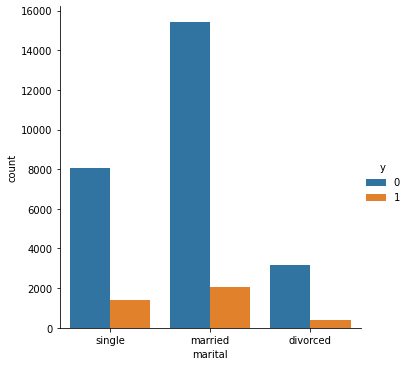

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x="marital", hue='y', kind='count', data=df)
plt.show();

In [33]:
grouped = df.groupby(['job', 'y'])['y'].count()
pd.crosstab(df['job'], df['y']).T


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
y,,,,,,,,,,,
0,7521,5223,988,603,2025,859,960,2599,407,4832,612
1,1216,452,101,87,286,357,132,258,203,641,126


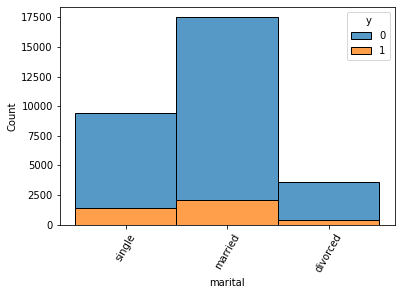

In [34]:
sns.histplot(x="marital" , hue='y', data=df, multiple = 'stack')
plt.xticks(rotation = 60)
plt.show();

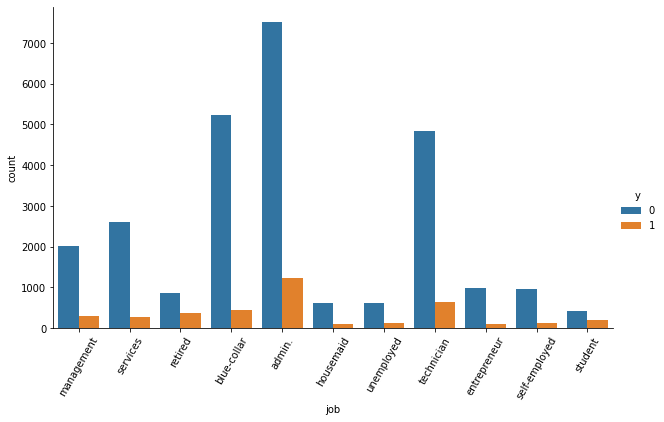

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x="job", hue='y', kind='count', data=df, aspect = 1.7)
plt.xticks(rotation = 60)
plt.show();

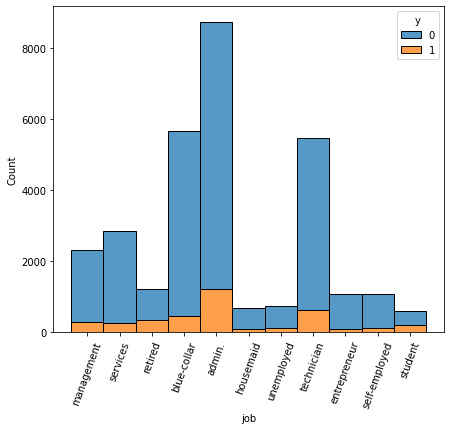

In [36]:
plt.figure(figsize=(7,6))
sns.histplot(x="job", hue='y', data=df, multiple = 'stack')
plt.xticks(rotation = 70)
plt.show();

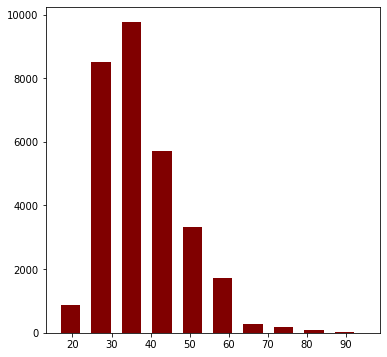

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (6,6))
plt.hist(df['age'],color='maroon', width = 5, )
plt.show()

# Section IV : Categorical Variable Encoding 

Part I : Create dummy variables for your categorial variables <br>
part II : Explore your new dataset with these new dummy variables !

In [38]:
dummies = pd.get_dummies(data = df, columns=(['job', 'marital', 'education', 'default', 'housing', 'loan',
                                      'contact', 'month', 'day_of_week','poutcome']), drop_first = True)
# df = pd.concat([df, dummies], axis = 1)
# df.head()
dummies

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic 6y,education_basic 9y,education_high school,education_illiterate,education_professional course,education_university degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,30,68,8,999.0,0,1.4,93.918,-42.7,4.961,5228.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
6,37,204,1,999.0,0,-1.8,92.893,-46.2,1.327,5099.1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41179,29,214,1,999.0,0,-1.8,92.893,-46.2,1.299,5099.1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
41181,39,123,2,999.0,0,-0.1,93.200,-42.0,4.153,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
41182,24,118,4,999.0,1,-1.8,92.893,-46.2,1.266,5099.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
41186,48,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [39]:
corr = dummies.corr()
corr = corr['y'][:10]
corr[abs(corr)>=.05].sort_values()


nr_employed      -0.364230
euribor3m        -0.315869
emp_var_rate     -0.305365
pdays            -0.300702
cons_price_idx   -0.128752
campaign         -0.069206
cons_conf_idx     0.061638
previous          0.228003
duration          0.393530
Name: y, dtype: float64

# Section V : Preliminary Training 

Part I : Import your [Logisitc Regression libraries](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) <br>
Part II : Split your train and test dataset and train on the data <br>
Part III : Make note of the classification report and other metrics 

In [40]:
x = dummies[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic 6y', 'education_basic 9y',
       'education_high school', 'education_illiterate',
       'education_professional course', 'education_university degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success']]
y = dummies[['y']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [41]:
print('Dimension of train_x dataframe:',x_train.shape)
print('Dimension of train_y dataframe:',y_train.shape)
print('Dimension of test_x dataframe:',x_test.shape)
print('Dimension of test_y dataframe:',y_test.shape)

Dimension of train_x dataframe: (22866, 47)
Dimension of train_y dataframe: (22866, 1)
Dimension of test_x dataframe: (7622, 47)
Dimension of test_y dataframe: (7622, 1)


In [42]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)

In [43]:
from sklearn.linear_model import LogisticRegression
lorg = LogisticRegression(random_state = 0)
lorg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = lorg.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred, labels = [0, 1]))
print(metrics.classification_report(y_test, y_pred, labels = [0,1]))

[[6441  191]
 [ 576  414]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6632
           1       0.68      0.42      0.52       990

    accuracy                           0.90      7622
   macro avg       0.80      0.69      0.73      7622
weighted avg       0.89      0.90      0.89      7622



In [46]:
d = {'Prediction':y_pred}
pred_comp =pd.DataFrame(d)
f = y_test.reset_index()
f = f.drop(['index'], axis=1)
df = pd.concat([pred_comp, f], axis=1)
df.head(143)

,Prediction,y
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
138,1,0
139,0,0
140,0,0
141,0,0


In [47]:
f.value_counts()

y
0    6632
1     990
dtype: int64

In [48]:
pred_comp.value_counts()

Prediction
0             7017
1              605
dtype: int64

# Section VI : Let's Improve the performance !

Part 0 : What was your answer to **Section - Part IV**? Do you think class imbalance affects the model performance? Explore [SMOTE implementation](https://arxiv.org/pdf/1106.1813.pdf)

Part I : Make note of the performance from the last training <br>
Part II : Try implementing [SMOTE](http://imbalanced-learn.org/en/stable/over_sampling.html#smote-variants) to balance the two class labels <br>
Part III :  Make note of the `y` label data now , what are the rations now ?

# Section VII : Let us Re-Train!

Part I : Explore what [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) means <br>
Part II : Implement your training process inside the RFE <br>
Part III : What are the best columns that your RFE found? Please make a list of it 

# Section VIII : Training time !

Now that you have found the best columns for this problem

Part I : Now train the model with the new data you have created after the RFE <br>
Part II : Create the prediction system to get the metrics such as accuracy

# Section IX : Additional Metrics

Accuracy is not always the best metric 

Part I : Explore what [Confusion Matrix](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/#:~:text=A%20confusion%20matrix%20is%20a,the%20performance%20of%20an%20algorithm.) means <br>
Part II : Create the confusion matrix for the predictions and make note of the outputs <br>
Part III : Create a classification report and make note of various outputs 

# Section X : What's next?

Part I : Make a note of difference in performance? <br>
Part II : Can you recommend more improvements that could give much better results in all metrics?